---

# CSCI 3202, Fall 2021
# Homework 2
# Due: Friday October 1, 2021 at 6:00 PM

<br> 

### Your name:

<br> 

---
required packages and libraries:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



from colorado_intro_ai.hw2.robot import Robot

---
# A* Search Problem

The A* objective function is expressed as $f(n) = g(n) + h(n)$, where $f(n)$ is the estimated cost to get form the start node to the goal node going through node $n$. $g(n)$ is the cost to get from the start to node $n$ and $h(n)$ is the estimated cost to move from node $n$ to the goal node. $h(n)$ is also known as a $\textit{heuristic}$ function. 

Familiarize yourself with the classes and documention linked below. You will implement your solutions inside of the [pathSolver.py](../colorado_intro_ai/hw2/pathSolver.py) class file. 

## Links
* [Robot class file](../colorado_intro_ai/hw2/robot.py)
* [Enviornment class file](../colorado_intro_ai/hw2/enviornment.py)
* [PathSolver class file](../colorado_intro_ai/hw2/pathSolver.py)
* [Colorado intro ai documentation](https://coloradointroai.github.io)

### Usage examples

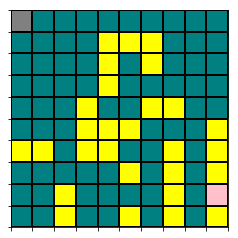

In [21]:

robot = Robot()
robot.show_env()
#robot.env.edge_weights_1

# You need to implement these methods
# path1, cost = robot.path_solver.a_star_euclidian()
# path2, cost = robot.path_solver.bfs()
# robot.state_dict

# robot.show_env_and_path(path1)


In [22]:
newpath=robot.path_solver.breadth_first_search(start=(0,0),goal=(8,9),state_graph=robot.env.edge_weights_1,return_cost=False)
print(newpath)

calliing BFS
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


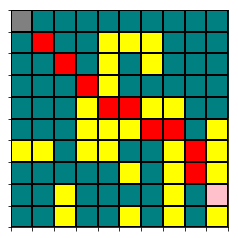

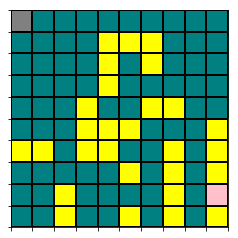

In [23]:
robot.show_env_and_path(newpath)

robot.show_env()

## A* Problem 1) 
Implement the first three functions in [pathSolver.py](../colorado_intro_ai/hw2/pathSolver.py), you should copy your code from homework 1 and make the required changes to fit the function declaration. In the cells below, demonstrate that each of the functions work by invoking each function using the `Robot` class as seen in the example. For each algorthim, include I) a visualization of the solved env using `show_env_and_path` and II) the cost of each path in table

| this | is   |
|------|------|
|   a  | table|



## A* Problem 2) 
Implement the function `a_star_euclidian` in [pathSolver.py](../colorado_intro_ai/hw2/pathSolver.py). Demonstrate your function works by calling it using the `Robot` class. For full credit include I) a visualization of the original and solved env using `show_env_and_path` II) Explain what benifits this algorithm has over bfs, dfs, and ucs.

#### Function Details
The A* objective function is $f(n) = g(n) + h(n)$. In this implementation $h(n) = \sqrt{(x_g - x_n)^2 + (y_g - y_n)^2}$. In this equation; $x_g$ and $x_n$ represent the column location of goal and current node, repectively. The variables $y_g$ and $y_n$ are the row values of each node.

## A* Problem 3) 
Implement the function `a_star_manhattan` in [pathSolver.py](../colorado_intro_ai/hw2/pathSolver.py). Demonstrate your function works by calling it using the `Robot` class. For full credit include:

1. A visualization of the original and solved env using `show_env_and_path`, include the path cost.
1. You must create and use a private class function within `a_star_manhattan` that computes the value of $h(x)$. You pick the private function name. 
1. Give a short explanation of why you would create a private function within a class in a personal project you are sharing with a friend.

#### Function Details
The A* objective function is $f(n) = g(n) + h(n)$. In this implementation $h(n) = (x_g - x_n) + (y_g - y_n)$. In this equation; $x_g$ and $x_n$ represent the column location of goal and current node, repectively. The variables $y_g$ and $y_n$ are the row values of each node. The robot _CAN_ still move in all 8 directions.

## A* Problem 4) 
Implement the function `a_star_euclidian_probabilty` in [pathSolver.py](../colorado_intro_ai/hw2/pathSolver.py). Demonstrate your function works by calling it using the `Robot` class. For full credit include:

1. A visualization of the original and solved env using `show_env_and_path`, include the path cost.
1. You must create and use two private class function within `a_star_euclidian_probabilty` that computes the value of $h(x)$ and $g(n)$. You pick the private function name. 
1. Give a real world example of the probabilistic edge weights

#### Function Details
The A* objective function is $f(n) = g(n) + h(n)$. In this implementation $h(n) = \sqrt{(x_g - x_n)^2 + (y_g - y_n)^2}$. In this equation; $x_g$ and $x_n$ represent the column location of goal and current node, repectively. The variables $y_g$ and $y_n$ are the row values of each node.

In this implementation, traversing an edge has two possible costs defined by a discrete probability distribution. The function 

$$g(n) = 
\sum_{w \in W}^{}\sum_{x \in X_w}^{}  xp_{X_w}(x) = \sum_{w \in W}^{}E[X_w]$$


In the equation above, $x$ is the edge cost and $p_X(x)$ is the probability that x is the edge cost when you actually traverse the edge. $X_w$ is a random variable that draws from the two possible edge weights of a particular edge, represented as $w$. The set $W$ contains all edges to get from the starting node to the particular node $n$.


#### Example calculation
Imagine the edge cost is the time to drive between two particular locations, dependent of if it's raining. What is the expected cost when we traverse the two edges?



##### Edge 1
| Is it raining? |  Edge cost  |  P(x)                     |
|----------------|-------------|---------------------------|
|      NO        |     10      |           0.7             |
|      YES       |     50      |           0.3             |

The expected value for this edge is:

$$
 E[X_1] = \sum_{x \in X_1}^{}  xp_{X_1}(x) = 10 \times p_{X_1}(\textrm{no rain}) + 50 \times p_{X_1}(\textrm{rain}) = 10 \times 0.7 + 50 \times 0.3 = 22
$$

From this we can see that 22 is the expected value of taking this particular example edge.


##### Edge 2
| Is it raining? |  Edge cost  |  P(x)                     |
|----------------|-------------|---------------------------|
|      NO        |     1       |           0.99             |
|      YES       |     1000      |           0.01             |


$$
 E[X_2] = \sum_{x \in X_2}^{}  xp_{X_2}(x) = 1 \times p_{X_2}(\textrm{no rain}) + 1000 \times p_{X_2}(\textrm{rain}) = 1 \times 0.99 + 1000 \times 0.01 = 10.99
$$


With these two values we can solve for the total expected cost of taking these two edges:


$$
    g(n) = \sum_{w \in W}^{}E[X_w] = E[X_1] + E[X_2] = 22 + 10.99 = 32.99
$$

<!-- For help with [Colorado intro ai documentation](https://vfu.bg/en/e-Learning/Math--Bertsekas_Tsitsiklis_Introduction_to_probability.pdf)
Ch 2 page 12 for example of expectation in a random variable
page 15 coin toss example -->


## Hill Climbing and Simulated Annealing
A common application for optimization algorithms, such as hill climbing and simulated annealing, is combinatorial problems where finding the optimal solution is computational intractable. In these instances, the objective is to find a good solution rather than the optimal solution. 


In [24]:


# DO THIS BEFORE YOU START TO MOVE YOUR CODE TO ANY CLASS FILES
# In order to automatically load in changes that you made to any 
# colorado_intro_ai class you need to edit your ipython configuration
# file. For Ubuntu 20.04 //TODO: give automatic command here
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython

robot = Robot()

# Example to visualize your connections
example_list_of_connections = []
for key in robot.state_dict:
    example_list_of_connections.append(robot.state_dict[key])

robot.show_city_connections(example_list_of_connections)

print(robot.get_dist_mi('texas', 'washington'))
print(robot.get_dist_km('texas', 'washington'))

# itinerary, miles, list_of_temps, list_of_current_cost = robot.simmulated_annealing()

AttributeError: 'Robot' object has no attribute 'show_city_connections'

In [5]:
# print(itinerary)
# print(miles)
# print(example_list_of_connections)

# robot.show_city_connections_by_name(itinerary)
# Also need to show graph of tempature over time and total distance of loop

Problem next 